In [45]:
#!pip install tensorflow-gpu==2.0.0-alpha0
import collections
import pandas as pd
import numpy as np
import time
import os
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [36]:
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'

In [3]:
tf.__version__

'1.13.1'

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_csv('/nfs/2018/j/jcruz-y-/neurotron_datasets/joined_data_66002_24-Oct-19_12:09_jose_thumb_1.csv')

In [4]:
df.head()

,Leap timestamp,timestamp diff,emg timestamp,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
0,1.571881e+09,0.027255,1.571881e+09,36.0,134.0,52.0,66.0,40.0,23.0,18.0,19.0,14.774895,-41.911118,28.868484,-13.722885,-44.715561,36.808525,-44.649223,-14.084595,15.750854,-65.168022,6.654526,0.268753,-80.627174,21.239609,-7.620781,-22.661293,25.786606,-0.747406,-32.294617,50.715622,-32.648777,-43.066952,48.442886,-53.312187,-50.781441,38.295547,-63.868496,-3.352757,22.706833,-9.535362,-13.627308,50.289932,-45.779358,-29.183559,47.039230,-68.278320,-40.014397,35.496567,-77.268532,15.537476,13.339523,-16.065361,6.849747,38.003555,-50.552784,-9.218124,34.708237,-71.790627,-21.013229,23.535507,-79.766327,30.426750,0.853592,-23.319221,29.460793,21.646652,-50.520226,18.767494,22.918198,-66.108513,5.993256,16.304031,-74.585464
1,1.571881e+09,-0.020455,1.571881e+09,46.0,127.0,56.0,69.0,39.0,24.0,21.0,18.0,15.120982,-42.337372,28.053088,-13.366233,-45.582881,35.859851,-44.456287,-14.032547,16.490850,-64.699994,7.276586,1.431384,-79.674077,22.149185,-6.839289,-22.914069,25.570582,-0.285380,-32.556740,51.323532,-31.518884,-43.270885,49.242498,-52.232421,-50.819617,39.019445,-62.835171,-3.555122,22.860102,-9.082870,-13.594410,51.217290,-44.789654,-28.984478,48.243515,-67.440371,-39.664645,36.703740,-76.612325,15.442546,13.814092,-15.751143,6.629501,39.062078,-49.779775,-9.407192,35.813777,-71.048355,-21.036837,24.502365,-79.071009,30.472186,1.625575,-23.216618,29.163127,22.834732,-50.078665,18.304637,24.026291,-65.558462,5.574804,17.155980,-73.896576
2,1.571881e+09,0.001832,1.571881e+09,46.0,128.0,82.0,71.0,47.0,27.0,20.0,19.0,15.236916,-42.699860,27.436996,-13.256252,-46.192993,35.116188,-44.344387,-13.729218,17.290604,-64.217621,8.164429,2.574936,-78.699249,23.369995,-5.970657,-23.028225,25.470367,0.048111,-32.525551,51.962921,-30.609673,-43.179840,50.094788,-51.374573,-50.622570,39.835083,-62.017033,-3.633846,22.982605,-8.738350,-13.386490,51.681519,-44.252869,-28.673233,48.595428,-66.958786,-39.222069,36.870483,-76.047905,15.422112,14.125366,-15.494659,6.600189,39.797729,-49.203358,-9.420330,36.559906,-70.485764,-20.940365,25.131409,-78.501053,30.526321,2.120483,-23.107353,29.055214,23.661774,-49.696579,18.103806,24.847778,-65.111450,5.401817,17.842865,-73.380524
3,1.571881e+09,0.012555,1.571881e+09,49.0,127.0,93.0,62.0,47.0,29.0,19.0,19.0,15.193947,-42.856445,27.215775,-13.311451,-46.394211,34.828873,-44.329765,-13.574219,17.542091,-64.028793,8.557846,2.949364,-78.351013,23.913254,-5.597000,-23.029011,25.469223,0.157326,-32.445007,52.199661,-30.318516,-43.076836,50.372849,-51.098602,-50.483139,40.077469,-61.732010,-3.620434,23.032364,-8.612030,-13.285526,51.682907,-44.189465,-28.553608,48.388809,-66.878716,-39.047562,36.520248,-75.844070,15.446640,14.214432,-15.388409,6.616112,39.908096,-49.078632,-9.473755,36.347458,-70.256920,-20.912308,24.651230,-77.997948,30.563431,2.253769,-23.045597,29.076378,23.919327,-49.532791,18.089577,25.101242,-64.922768,5.390579,18.041702,-73.1498

In [5]:
df = df.drop(labels=["Leap timestamp", "timestamp diff", "emg timestamp"], axis=1)

In [6]:
df.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
0,36.0,134.0,52.0,66.0,40.0,23.0,18.0,19.0,14.774895,-41.911118,28.868484,-13.722885,-44.715561,36.808525,-44.649223,-14.084595,15.750854,-65.168022,6.654526,0.268753,-80.627174,21.239609,-7.620781,-22.661293,25.786606,-0.747406,-32.294617,50.715622,-32.648777,-43.066952,48.442886,-53.312187,-50.781441,38.295547,-63.868496,-3.352757,22.706833,-9.535362,-13.627308,50.289932,-45.779358,-29.183559,47.039230,-68.278320,-40.014397,35.496567,-77.268532,15.537476,13.339523,-16.065361,6.849747,38.003555,-50.552784,-9.218124,34.708237,-71.790627,-21.013229,23.535507,-79.766327,30.426750,0.853592,-23.319221,29.460793,21.646652,-50.520226,18.767494,22.918198,-66.108513,5.993256,16.304031,-74.585464
1,46.0,127.0,56.0,69.0,39.0,24.0,21.0,18.0,15.120982,-42.337372,28.053088,-13.366233,-45.582881,35.859851,-44.456287,-14.032547,16.490850,-64.699994,7.276586,1.431384,-79.674077,22.149185,-6.839289,-22.914069,25.570582,-0.285380,-32.556740,51.323532,-31.518884,-43.270885,49.242498,-52.232421,-50.819617,39.019445,-62.835171,-3.555122,22.860102,-9.082870,-13.594410,51.217290,-44.789654,-28.984478,48.243515,-67.440371,-39.664645,36.703740,-76.612325,15.442546,13.814092,-15.751143,6.629501,39.062078,-49.779775,-9.407192,35.813777,-71.048355,-21.036837,24.502365,-79.071009,30.472186,1.625575,-23.216618,29.163127,22.834732,-50.078665,18.304637,24.026291,-65.558462,5.574804,17.155980,-73.896576
2,46.0,128.0,82.0,71.0,47.0,27.0,20.0,19.0,15.236916,-42.699860,27.436996,-13.256252,-46.192993,35.116188,-44.344387,-13.729218,17.290604,-64.217621,8.164429,2.574936,-78.699249,23.369995,-5.970657,-23.028225,25.470367,0.048111,-32.525551,51.962921,-30.609673,-43.179840,50.094788,-51.374573,-50.622570,39.835083,-62.017033,-3.633846,22.982605,-8.738350,-13.386490,51.681519,-44.252869,-28.673233,48.595428,-66.958786,-39.222069,36.870483,-76.047905,15.422112,14.125366,-15.494659,6.600189,39.797729,-49.203358,-9.420330,36.559906,-70.485764,-20.940365,25.131409,-78.501053,30.526321,2.120483,-23.107353,29.055214,23.661774,-49.696579,18.103806,24.847778,-65.111450,5.401817,17.842865,-73.380524
3,49.0,127.0,93.0,62.0,47.0,29.0,19.0,19.0,15.193947,-42.856445,27.215775,-13.311451,-46.394211,34.828873,-44.329765,-13.574219,17.542091,-64.028793,8.557846,2.949364,-78.351013,23.913254,-5.597000,-23.029011,25.469223,0.157326,-32.445007,52.199661,-30.318516,-43.076836,50.372849,-51.098602,-50.483139,40.077469,-61.732010,-3.620434,23.032364,-8.612030,-13.285526,51.682907,-44.189465,-28.553608,48.388809,-66.878716,-39.047562,36.520248,-75.844070,15.446640,14.214432,-15.388409,6.616112,39.908096,-49.078632,-9.473755,36.347458,-70.256920,-20.912308,24.651230,-77.997948,30.563431,2.253769,-23.045597,29.076378,23.919327,-49.532791,18.089577,25.101242,-64.922768,5.390579,18.041702,-73.149887
4,46.0,129.0,102.0,70.0,45.0,27.0,19.0,22.0,15.117997,-43.421595,26.344393,-13.427787,-47.192200,33.687737,-44.322858,-13.556007,17.817881,-63.657493,9.176361,3.670753,-77.777748,24.

In [7]:
df.describe()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Wrist x,Wrist y,Wrist z,Thumb Proximal x,Thumb Proximal y,Thumb Proximal z,Thumb Intermediate x,Thumb Intermediate y,Thumb Intermediate z,Thumb Distal x,Thumb Distal y,Thumb Distal z,Thumb Tip x,Thumb Tip y,Thumb Tip z,Index Proximal x,Index Proximal y,Index Proximal z,Index Intermediate x,Index Intermediate y,Index Intermediate z,Index Distal x,Index Distal y,Index Distal z,Index Tip x,Index Tip y,Index Tip z,Middle Proximal x,Middle Proximal y,Middle Proximal z,Middle Intermediate x,Middle Intermediate y,Middle Intermediate z,Middle Distal x,Middle Distal y,Middle Distal z,Middle Tip x,Middle Tip y,Middle Tip z,Ring Proximal x,Ring Proximal y,Ring Proximal z,Ring Intermediate x,Ring Intermediate y,Ring Intermediate z,Ring Distal x,Ring Distal y,Ring Distal z,Ring Tip x,Ring Tip y,Ring Tip z,Pinky Proximal x,Pinky Proximal y,Pinky Proximal z,Pinky Intermediate x,Pinky Intermediate y,Pinky Intermediate z,Pinky Distal x,Pinky Distal y,Pinky Distal z,Pinky Tip x,Pinky Tip y,Pinky Tip z
count,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000,66002.000000
mean,80.398670,263.853989,240.563513,108.572952,47.852701,34.135238,27.687419,34.214615,15.628867,-9.636118,42.504739,-8.853896,-19.143357,46.381890,-37.486184,-21.893227,16.337011,-52.643159,-24.575628,-3.823726,-59.410447,-26.705491,-15.393781,-24.942067,8.076910,-15.477016,-35.590848,-5.329349,-48.276948,-41.420593,-16.481926,-64.732954,-45.317816,-25.688659,-74.980993,-6.210362,9.701155,-18.142907,-16.588028,-8.042621,-54.273002,-23.565451,-22.753434,-72.741069,-28.336703,-33.853304,-83.182693,13.239948,7.947346,-16.207959,3.760514,-8.667989,-49.647210,-3.278007,-22.794163,-67.777573,-8.360278,-33.646331,-78.418629,30.419273,2.234340,-13.731176,27.610719,-8.545469,-41.336284,24.433938,-16.946437,-55.354338,20.781010,-25.524480,-66.550817
std,40.117646,109.149310,120.180316,72.581889,20.991431,18.825727,12.593379,37.129393,15.825413,12.860273,11.300732,19.513547,17.080521,11.018947,17.343289,16.078972,14.066530,25.183020,21.727323,21.381719,34.325499,26.818085,27.956943,6.939991,6.508655,10.529884,15.467803,14.009727,13.741926,20.001841,19.794035,15.694227,22.977653,23.992022,17.473098,7.686875,5.639035,6.198857,17.323390,17.005286,10.421288,22.388266,24.070134,13.404358,25.428132,28.535368,16.007630,7.716814,7.933290,4.963204,16.356959,18.320780,8.953181,21.284995,25.097148,12.641308,24.343402,29.462867,15.668353,7.931476,11.494570,9.648849,16.425902,19.394448,11.589994,20.941002,24.135852,13.565762,24.662535,28.174338,15.868269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-41.769203,-49.962799,0.000000,-58.613197,-55.231729,0.000000,-75.124115,-63.879837,-37.188974,-105.185623,-86.412979,-68.617961,-126.288147,-91.383759,-89.471339,-33.618752,-15.178196,-34.146778,-64.539724,-49.275574,-72.147652,-85.884410,-66.214897,-93.330811,-100.719783,-82.686340,-109.333484,-21.526745,-7.785858,-25.334070,-63.473035,-51.173683,-71.729972,-88.499311,-77.155800,-98.184779,-104.805283,-94.416588,-116.448059,-10.103988,-20.103516,-25.792450,-50.135470,-52.239143,-65.242197,-74.705999

### Autoencoder

In [8]:
raw_features = df.loc[:, 'ch1':'ch8'].values
raw_labels = df.loc[:, 'Wrist x':].values

In [9]:
raw_features.shape

(66002, 8)

In [10]:
raw_labels.shape

(66002, 63)

In [11]:
encoding_dim = 9

input_vec = Input(shape=(63,))
dense_0 = Dense(32, activation=None)(input_vec)
dense_1 = Dense(16, activation=None)(dense_0)
encoded = Dense(encoding_dim, activation=None)(dense_1)
dense_2 = Dense(32, activation=None, name='decoder_0')(encoded)
dense_3 = Dense(16, activation=None, name='decoder_1')(dense_2)
decoded = Dense(63, activation=None, name='decoder_output')(dense_3)

autoencoder = Model(input_vec, decoded)
encoder = Model(input_vec, encoded)

encoded_input = Input(shape=(encoding_dim,), name='encoded_input')
decode_0 = autoencoder.layers[-3](encoded_input)
decode_1 = autoencoder.layers[-2](decode_0)
decode_output = autoencoder.layers[-1](decode_1)
decoder = Model(encoded_input, decode_output, name='decoder')
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2048      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 153       
_________________________________________________________________
decoder_0 (Dense)            (None, 32)                320       
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                528       
______________________

In [12]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2048      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 153       
Total params: 2,729
Trainable params: 2,729
Non-trainable params: 0
_________________________________________________________________


In [13]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_input (InputLayer)   (None, 9)                 0         
_________________________________________________________________
decoder_0 (Dense)            (None, 32)                320       
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                528       
_________________________________________________________________
decoder_output (Dense)       (None, 63)                1071      
Total params: 1,919
Trainable params: 1,919
Non-trainable params: 0
_________________________________________________________________


In [14]:
autoencoder.evaluate(raw_labels, raw_labels)

66002/66002 [==============================] - 3s 42us/sample - loss: 2340.5415


2340.5415022343072

In [18]:
ret = autoencoder.fit(raw_labels, raw_labels, batch_size=512, epochs=1, verbose=1, validation_split=0.2)

Train on 52801 samples, validate on 13201 samples
52801/52801 [==============================] - 1s 13us/sample - loss: 30.1281 - val_loss: 30.1364


In [19]:
#evaluate autoencoder performance
encoded_vec = encoder.predict(raw_labels)
decoded_vec = decoder.predict(encoded_vec)

In [20]:
decoder.compile(optimizer='adam', loss='mse')
decoder.evaluate(encoded_vec, raw_labels)

66002/66002 [==============================] - 3s 40us/sample - loss: 27.4253


27.42531593852943

In [21]:
encoded_vec.shape

(66002, 9)

In [22]:
decoded_vec.shape

(66002, 63)

In [23]:
# def reshape_data(seq_length, features, labels):
#     samples = features.shape[0] // seq_length
#     new_f = np.zeros((samples, seq_length, features.shape[1]))
#     new_l = np.zeros((samples, seq_length, labels.shape[1]))
#     j = 0
#     for i in range(0, features.shape[0], seq_length):
#         if (i + seq_length <= features.shape[0]):
#             new_f[j] = features[i:i + seq_length]
#             new_l[j] = labels[i:i + seq_length]
#         j += 1
#     return (new_f, new_l)

In [24]:
def overlap_reshape(seq_length, feats, labs):
    samples = feats.shape[0] - (seq_length - 1)
    new_f = np.zeros((samples, seq_length, feats.shape[1]))
    new_l = labs[seq_length - 1:]
    queue = collections.deque(feats[:seq_length])
    new_f[0] = np.array(queue)
    j = 1
    for i in range(seq_length, feats.shape[0]):
        queue.popleft()
        queue.append(feats[i])
        new_f[j] = np.array(queue)
        j += 1
    return (new_f, new_l)

### Lotery LSTM (Autoencoder)

In [25]:
seq_length = 24
features, labels = overlap_reshape(seq_length, raw_features, encoded_vec)

In [26]:
# seq_length = 24
# features, labels = reshape_data(seq_length, raw_features, encoded_vec)

In [27]:
labels.shape

(65979, 9)

In [28]:
features.shape

(65979, 24, 8)

In [29]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_input (InputLayer)   (None, 9)                 0         
_________________________________________________________________
decoder_0 (Dense)            (None, 32)                320       
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                528       
_________________________________________________________________
decoder_output (Dense)       (None, 63)                1071      
Total params: 1,919
Trainable params: 1,919
Non-trainable params: 0
_________________________________________________________________


In [47]:
#lstm layers
inputs = Input(shape=(None, 8), name="inputs")
lstm_0 = LSTM(42, return_sequences=True, name="lstm_0")(inputs)
lstm_1 = LSTM(42, return_sequences=False, name="lstm_1")(lstm_0)
lstm_out = Dense(9, activation=None, name="lstm_out")(lstm_1)

#decoder layers
decoder_0 = decoder.get_layer("decoder_0")(lstm_out)
decoder_0.trainable = False
decoder_1 = decoder.get_layer("decoder_1")(decoder_0)
decoder_1.trainable = False
decoder_output = decoder.get_layer("decoder_output")(decoder_1)
decoder_output.trainable = False

model = Model(inputs, decoder_output, name="model_v1")
# model = Model(inputs, dense, name="lstm_model")
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, None, 8)           0         
_________________________________________________________________
lstm_0 (LSTM)                (None, None, 42)          8568      
_________________________________________________________________
lstm_1 (LSTM)                (None, 42)                14280     
_________________________________________________________________
lstm_out (Dense)             (None, 9)                 387       
_________________________________________________________________
decoder_0 (Dense)            (None, 32)                320       
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                528       
_________________________________________________________________
decoder_output (Dense)       (None, 63)                1071      
Total para

In [48]:
features.shape

(65979, 24, 8)

In [49]:
raw_labels[seq_length - 1:].shape

(65979, 63)

In [50]:
model.evaluate(features, raw_labels[seq_length - 1:], verbose=1)

65979/65979 [==============================] - 19s 286us/sample - loss: 1386.4281


1386.4280998278432

In [51]:
history = model.fit(features, raw_labels[seq_length - 1:], batch_size=seq_length, epochs=4, verbose=1, validation_split=0.2);

Train on 52783 samples, validate on 13196 samples
Epoch 1/4
52783/52783 [==============================] - 87s 2ms/sample - loss: 218.7611 - val_loss: 122.3969
Epoch 2/4
52783/52783 [==============================] - 82s 2ms/sample - loss: 160.3901 - val_loss: 140.7041
Epoch 3/4
52783/52783 [==============================] - 82s 2ms/sample - loss: 148.0352 - val_loss: 170.7930
Epoch 4/4
52783/52783 [==============================] - 82s 2ms/sample - loss: 138.2281 - val_loss: 128.1246


#### LSTM experiment log: 
1. jose_finger_5:<br>
    a. 64 cells, 2 layers, 1 epoch, train_loss: 100, val_loss: 76<br>
    b. 32 cells, 2 layers, 1 epoch, train_loss: 82, val_loss: 72<br>
    c. 42 cells, 2 layers, 1 epoch, train_loss: 92, val_loss: 68 (lucky 4 epoch train_loss:62 and val_loss:68)<br>
   

In [40]:
model.save("/nfs/2018/j/jcruz-y-/neurotron_models/model_val_loss_190_thumb_jose_1.h5")

In [82]:
m = load_model("saved_models/model_overfitted_thomas_2_001.h5")

In [83]:
m.evaluate(features, raw_labels[seq_length - 1:])

90434/90434 [==============================] - 34s 373us/sample - loss: 329.6422


329.6421536507562

In [ ]:
preds = model.predict(features)

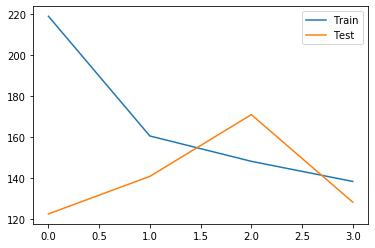

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])

In [ ]:
error = raw_labels[seq_length - 1:] - preds
sq_error = error * error
avg_error = np.mean(sq_error, axis=0)
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
plt.ylabel('Prediction Error (mm)')
bar = plt.bar(df.columns[8:], avg_error)
for i in range(0,63,3):
    bar[i].set_color('coral')
    bar[i+1].set_color('olivedrab')
plt.show()

In [ ]:
preds.shape

In [ ]:
preds = preds.reshape(-1, 9)

In [ ]:
preds.shape

In [ ]:
raw_labels[:preds.shape[0]].shape

In [ ]:
raw_labels[seq_length - 1:].shape

In [ ]:
decoder.evaluate(preds, raw_labels[seq_length - 1:])

#### Save predictions

In [ ]:
full_preds = decoder.predict(preds)

In [ ]:
full_preds_df = pd.DataFrame(data=full_preds, columns=df.loc[:, 'Wrist x':].columns)

In [ ]:
full_preds_df.to_csv("predictions/pred_001.csv", index=False)

### Run a model multiple times until it hits the lottery

In [ ]:
%%time
eval_loss = 300
current_best = 1000
cur_model = 0

while (eval_loss > 180):
    total_epochs = 0
    inputs = Input(shape=(None, 8))
    lstm = LSTM(64, return_sequences=True)(inputs)
    lstm = LSTM(64, return_sequences=True)(lstm)
    dense = Dense(9, activation=None)(lstm)

    model = Model(inputs, dense)
    optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=optimizer, loss='mse')

    model.evaluate(features, labels, verbose=1)

    history = model.fit(features, labels, batch_size=seq_length, epochs=1, verbose=1, validation_split=0.2)

    while (history.history['loss'][-1] - history.history['val_loss'][-1] > -100):
        history = model.fit(features, labels, batch_size=seq_length, epochs=10, verbose=1, validation_split=0.2)
        total_epochs += 10
    
    preds = model.predict(features)
    preds = preds.reshape(-1, 9)
    eval_loss = decoder.evaluate(preds, raw_labels[:preds.shape[0]])
    if (eval_loss < current_best):
        current_best = eval_loss
        model.save('saved_models/model_{}.h5'.format(round(current_best)))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||")
    print("Current model ==> {}".format(cur_model))
    print("Total epochs  ==> {}".format(total_epochs))
    print("Current loss  ==> {}".format(eval_loss))
    print("Current best  ==> {}".format(current_best))
    print("|||||||||||||||||||||||||||||||||||||||||||||||||")
    cur_model += 1

### Saving and loading model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model_200.h5')

In [ ]:
model.save_weights('model_200_weights.h5')

In [ ]:
model.summary()

In [ ]:
inputs = Input(shape=(None, 8))
lstm = LSTM(256, recurrent_activation='hard_sigmoid', return_sequences=True)(inputs)
lstm = LSTM(256, recurrent_activation='hard_sigmoid', return_sequences=True)(lstm)
#lstm3 = CuDNNLSTM(256, return_sequences=True)(lstm2)
#lstm4 = CuDNNLSTM(256, return_sequences=True)(lstm3)
dense = Dense(63, activation=None)(lstm)

model = Model(inputs, dense)
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

In [ ]:
model.load_weights('model_200_weights.h5')

In [ ]:
model.summary()

In [ ]:
model.evaluate(features, labels)

In [ ]:
model.save('model_200_v2.h5')

### Lotery LSTM

In [ ]:
inputs = Input(shape=(None, 8))
lstm = CuDNNLSTM(256, return_sequences=True)(inputs)
lstm = CuDNNLSTM(256, return_sequences=True)(lstm)
#lstm3 = CuDNNLSTM(256, return_sequences=True)(lstm2)
#lstm4 = CuDNNLSTM(256, return_sequences=True)(lstm3)
dense = Dense(63, activation=None)(lstm)

model = Model(inputs, dense)
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

In [ ]:
seq_length = 32

In [ ]:
features, labels = reshape_data(seq_length, raw_features, raw_labels)

In [ ]:
features.shape

In [ ]:
labels.shape

In [ ]:
model.evaluate(features, labels, verbose=1)

In [ ]:
model.fit(features, labels, batch_size=seq_length, epochs=100, verbose=1, validation_split=0.2)

In [ ]:
model.save("model_200.h5")

### LSTM Model google Colab

In [ ]:
seq_length = 100
features = df.loc[:, 'ch1':'ch8'].values
labels = df.loc[:, 'Wrist x':].values

In [ ]:
features, labels = reshape_data(seq_length, features, encoded_vec)

In [ ]:
features.shape

In [ ]:
labels.shape

In [ ]:
input_size = features.shape[2]
hidden_size = 256
output_size = labels.shape[2]

input_vec = Input(shape=(None, input_size))
lstm = CuDNNLSTM(hidden_size, return_sequences=True)(input_vec)
lstm = CuDNNLSTM(hidden_size, return_sequences=True)(lstm)
dense = Dense(output_size, activation=None)(lstm)

model = Model(input_vec, dense)
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

In [ ]:
model.fit(features, labels, batch_size=100, epochs=1000, verbose=1, validation_split=0.2)

### Neural Net Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(63, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

In [ ]:
%%time
#ret = model.fit(features, labels, epochs=3000, verbose=2)
ret = model.fit(features, labels, batch_size=256, epochs=1000, verbose=2, validation_split=0.2)

### RNN model

In [41]:
#lstm layers
inputs = Input(shape=(None, 8), name="inputs")
rnn_0 = SimpleRNN(32, return_sequences=True, name="lstm_0")(inputs)
rnn_1 = SimpleRNN(32, return_sequences=False, name="lstm_1")(rnn_0)
rnn_out = Dense(9, activation=None, name="lstm_out")(rnn_1)

#decoder layers
decoder_0 = decoder.get_layer("decoder_0")(rnn_out)
decoder_0.trainable = False
decoder_1 = decoder.get_layer("decoder_1")(decoder_0)
decoder_1.trainable = False
decoder_output = decoder.get_layer("decoder_output")(decoder_1)
decoder_output.trainable = False

model = Model(inputs, decoder_output, name="model_v1")
# model = Model(inputs, dense, name="lstm_model")
optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=optimizer, loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, None, 8)           0         
_________________________________________________________________
lstm_0 (SimpleRNN)           (None, None, 32)          1312      
_________________________________________________________________
lstm_1 (SimpleRNN)           (None, 32)                2080      
_________________________________________________________________
lstm_out (Dense)             (None, 9)                 297       
_________________________________________________________________
decoder_0 (Dense)            (None, 32)                320       
_________________________________________________________________
decoder_1 (Dense)            (None, 16)                528       
_________________________________________________________________
decoder_output (Dense)       (None, 63)                1071      
Total para

In [42]:
model.evaluate(features, raw_labels[seq_length - 1:], verbose=1)

65979/65979 [==============================] - 9s 129us/sample - loss: 1516.7232


1516.723164109246

In [43]:
model.fit(features, raw_labels[seq_length - 1:], batch_size=seq_length, epochs=5, verbose=1, validation_split=0.2)

Train on 52783 samples, validate on 13196 samples
Epoch 1/5
52783/52783 [==============================] - 27s 517us/sample - loss: 286.9632 - val_loss: 187.2000
Epoch 2/5
52783/52783 [==============================] - 27s 509us/sample - loss: 257.5150 - val_loss: 203.6774
Epoch 3/5
52783/52783 [==============================] - 26s 486us/sample - loss: 247.1652 - val_loss: 265.4428
Epoch 4/5
52783/52783 [==============================] - 23s 441us/sample - loss: 256.6244 - val_loss: 194.6943
Epoch 5/5
52783/52783 [==============================] - 24s 452us/sample - loss: 245.9073 - val_loss: 224.5425


#### Average conversion:
1. jose_finger_5: val_loss 70, train_loss = 110 of RNN model after 2 or more epochs